# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )


Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run parse_data.ipynb

finaldata.describe(include = 'all')

numeric_cols = [
    "Population",
    "Electricity demand",
    "GHG emissions",
    "FF electricity share",
    "RE electricity share"
]

df = finaldata[numeric_cols].copy()

display(finaldata.head())

,Country,Year,ISO,Population,Electricity demand,GHG emissions,FF electricity share,RE electricity share,Income Group FY23
1,Albania,2021,ALB,2849591.0,8.39,0.21,0.000,100.000,UM
2,Algeria,2021,DZA,44761051.0,84.45,54.23,99.054,0.946,LM
3,American Samoa,2021,ASM,49202.0,0.17,0.11,100.000,0.000,UM
4,Angola,2021,AGO,34532382.0,16.85,2.91,24.570,75.430,LM
5,Antigua and Barbuda,2021,ATG,92316.0,0.35,0.22,94.286,5.714,H


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    x0 = np.mean(x)       # mean
    x1 = np.median(x)     # median
    
    mode_result = stats.mode(x, nan_policy='omit', keepdims=True)
    x2 = mode_result.mode[0] if mode_result.mode.size > 0 else np.nan
    
    return x0, x1, x2


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return y0,y1,y2,y3,y4,y5,y6

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:
def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {
        "Population": 0,
        "Electricity demand": 2,
        "GHG emissions": 2,
        "FF electricity share": 2,
        "RE electricity share": 2
    }
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,Population,Electricity demand,GHG emissions,FF electricity share,RE electricity share
mean,39207284.0,140.18,69.46,60.99,35.44
median,7484547.0,11.73,2.77,67.13,24.18
mode,11687.0,0.17,0.07,100.00,0.00


<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=2):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    
    round_dict = {
        "Population": 0,
        "Electricity demand": 2,
        "GHG emissions": 2,
        "FF electricity share": 2,
        "RE electricity share": 2
    }
    
    df_dispersion = df.apply(lambda x: dispersion(x), axis=0).round(round_dict)
    
    row_labels_dispersion = ('st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR')
    df_dispersion.index = row_labels_dispersion
    
    display(df_dispersion)

display_dispersion_table(num=2)

<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,Population,Electricity demand,GHG emissions,FF electricity share,RE electricity share
st.dev.,1.464565e+08,686.97,391.94,33.06,32.00
min,1.168700e+04,0.04,0.00,0.00,0.00
max,1.426437e+09,8520.02,5112.06,100.00,100.00
range,1.426426e+09,8519.98,5112.06,100.00,100.00
25th,1.501708e+06,1.74,0.37,30.88,6.66
75th,2.691571e+07,57.03,20.78,90.91,62.66
IQR,2.541400e+07,55.29,20.41,60.03,56.00


Let's save the variables in easier-to-use variable names:

In [6]:
# Dependent variable (DV)
y = finaldata['FF electricity share']   # fossil fuel electricity share (%)

# Independent variables (IVs)
pop  = finaldata['Population']          # population size
edem = finaldata['Electricity demand']  # electricity demand
ghg  = finaldata['GHG emissions']       # greenhouse gas emissions

Let's create scatterplots for the DV (quality) vs. each of the three IVs (acid, density, sugar):

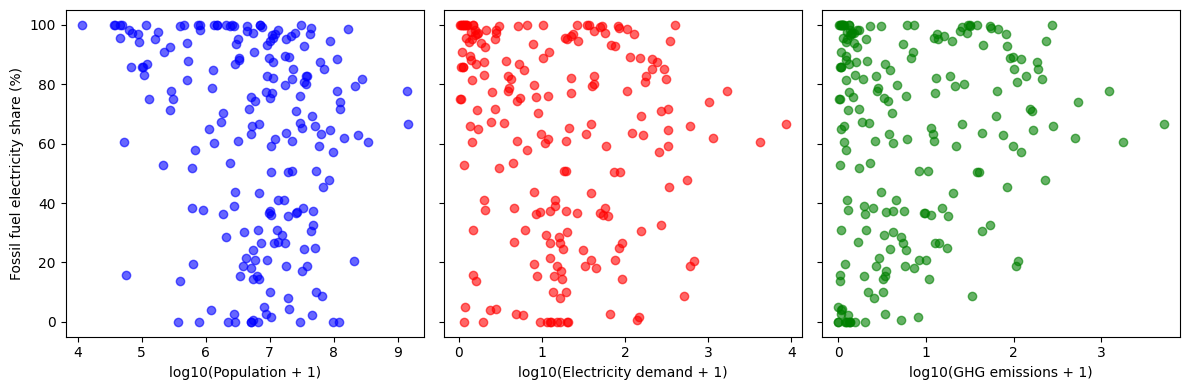

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

# Use log10(x + 1) for population, electricity demand, GHG
pop_log  = np.log10(pop + 1)
edem_log = np.log10(edem + 1)
ghg_log  = np.log10(ghg + 1)

axs[0].scatter(pop_log,  y, alpha=0.6, color='b')
axs[1].scatter(edem_log, y, alpha=0.6, color='r')
axs[2].scatter(ghg_log,  y, alpha=0.6, color='g')

axs[0].set_xlabel('log10(Population + 1)')
axs[1].set_xlabel('log10(Electricity demand + 1)')
axs[2].set_xlabel('log10(GHG emissions + 1)')

axs[0].set_ylabel('Fossil fuel electricity share (%)')
[ax.set_yticklabels([]) for ax in axs[1:]]

plt.show()

The density xtick values are difficult to reach so let's make them easier to read:

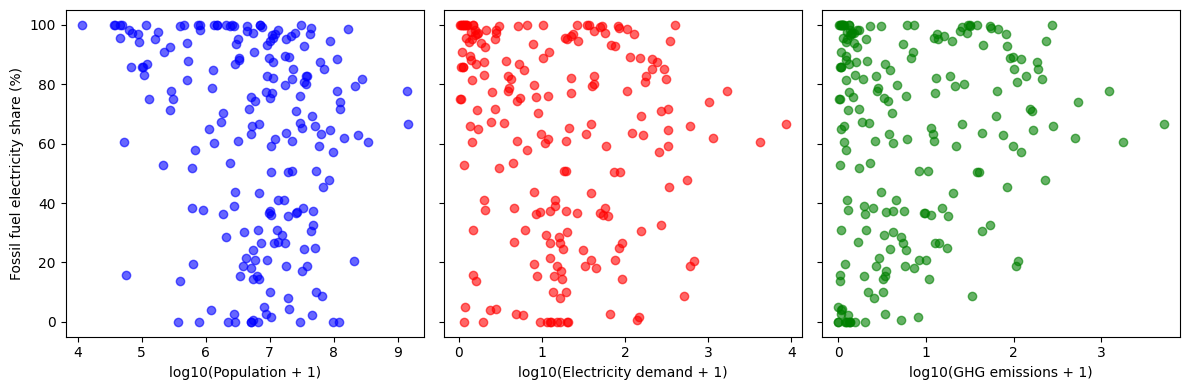

In [8]:
pop_log  = np.log10(pop + 1)
edem_log = np.log10(edem + 1)
ghg_log  = np.log10(ghg + 1)

fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

axs[0].scatter(pop_log,  y, alpha=0.6, color='b')
axs[1].scatter(edem_log, y, alpha=0.6, color='r')
axs[2].scatter(ghg_log,  y, alpha=0.6, color='g')

xlabels = (
    'log10(Population + 1)',
    'log10(Electricity demand + 1)',
    'log10(GHG emissions + 1)'
)

[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]
axs[0].set_ylabel('Fossil fuel electricity share (%)')
[ax.set_yticklabels([]) for ax in axs[1:]]

plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [9]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0, 1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    # drop NaNs just in case
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]
    
    a, b = np.polyfit(x_clean, y_clean, deg=1)
    x0, x1 = x_clean.min(), x_clean.max()
    y0, y1 = a * x0 + b, a * x1 + b
    ax.plot([x0, x1], [y0, y1], **kwargs)


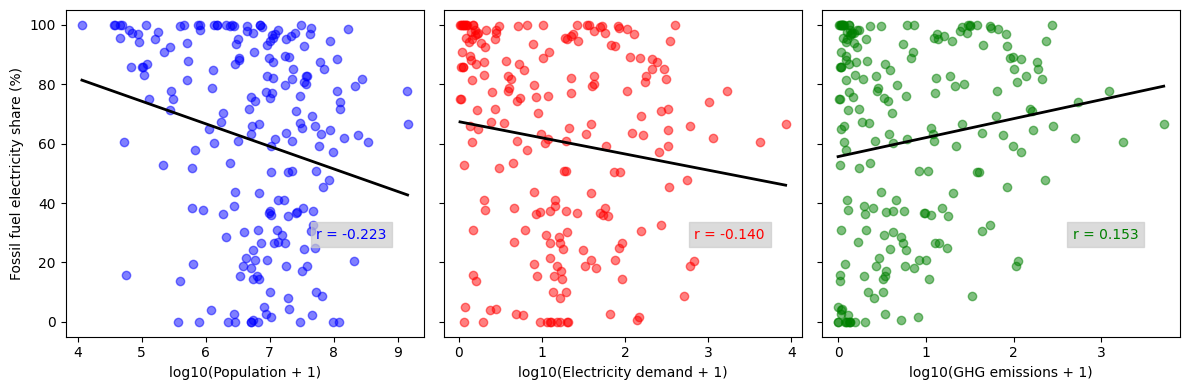

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), tight_layout=True)

ivs    = [pop_log, edem_log, ghg_log]
colors = ['b', 'r', 'g']

for ax, x, c in zip(axs, ivs, colors):
    ax.scatter(x, y, alpha=0.5, color=c)
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r = corrcoeff(x, y)
    ax.text(
        0.7, 0.3,
        f'r = {r:.3f}',
        color=c,
        transform=ax.transAxes,
        bbox=dict(color='0.8', alpha=0.7)
    )

xlabels = [
    'log10(Population + 1)',
    'log10(Electricity demand + 1)',
    'log10(GHG emissions + 1)'
]
[ax.set_xlabel(s) for ax, s in zip(axs, xlabels)]

axs[0].set_ylabel('Fossil fuel electricity share (%)')
[ax.set_yticklabels([]) for ax in axs[1:]]

plt.show()

The correlation coefficients are all relatively low, suggesting no clear linear correlation between the DV and IVs.

However, in the sugar data (right panel above) it appears that there may be opposite trends for low-quality wines (quality <= 5) and high-quality wines (quality > 5).  Let's plot quality vs. sugar separately for the low- and high-quality groups, along with linear regression trends.

In [11]:
#def plot_regression_line(ax, x, y, **kwargs):
    # convert to numpy arrays
 #x = np.asarray(x, dtype=float)
  #  y = np.asarray(y, dtype=float)

   # drop NaNs
   #mask = ~np.isnan(x) & ~np.isnan(y)
    #x_clean = x[mask]
    #y_clean = y[mask]

    # if not enough points, don't try to fit
    #if x_clean.size < 2:
     #   return

    #a, b = np.polyfit(x_clean, y_clean, deg=1)
    #x0, x1 = x_clean.min(), x_clean.max()
    #y0, y1 = a * x0 + b, a * x1 + b
    #ax.plot([x0, x1], [y0, y1], **kwargs)

Low & lower-middle income n = 0
Upper-middle & high-income n = 0


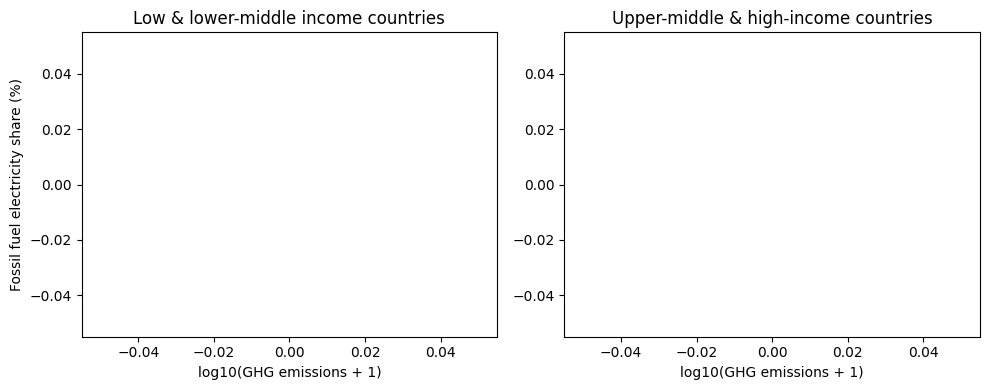

In [12]:
df_plot = finaldata[['FF electricity share',
                     'GHG emissions',
                     'Income Group FY23']].dropna()

y       = df_plot['FF electricity share']
ghg     = df_plot['GHG emissions']
ghg_log = np.log10(ghg + 1)

low_groups  = ['Low income', 'Lower middle income']
high_groups = ['Upper middle income', 'High income']

i_low  = df_plot['Income Group FY23'].isin(low_groups)
i_high = df_plot['Income Group FY23'].isin(high_groups)

print("Low & lower-middle income n =", i_low.sum())
print("Upper-middle & high-income n =", i_high.sum())

# --- 2. Safe regression-line function ---
def plot_regression_line(ax, x, y, **kwargs):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)

    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    if x_clean.size < 2:
        return  # not enough points to fit a line

    a, b = np.polyfit(x_clean, y_clean, deg=1)
    x0, x1 = x_clean.min(), x_clean.max()
    y0, y1 = a * x0 + b, a * x1 + b
    ax.plot([x0, x1], [y0, y1], **kwargs)

# --- 3. Plot: GHG vs FF share by income group ---
fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

for ax, mask, title in zip(
    axs,
    [i_low, i_high],
    ['Low & lower-middle income countries',
     'Upper-middle & high-income countries']
):
    ax.scatter(ghg_log[mask], y[mask], alpha=0.5, color='g')
    plot_regression_line(ax, ghg_log[mask], y[mask], color='k', ls='-', lw=2)
    ax.set_title(title)
    ax.set_xlabel('log10(GHG emissions + 1)')

axs[0].set_ylabel('Fossil fuel electricity share (%)')

plt.show()

The linear trend lines in the figures above appear to be opposite to the visual patterns:

- Quality appears to increase with sugar in low-quality wines
- Quality appears to descrease with sugar in low-quality wines

Linear regression suggests that the average pattern is opposite. To see why let's highlight the average for each wine quality score.

NameError: name 'sugr' is not defined

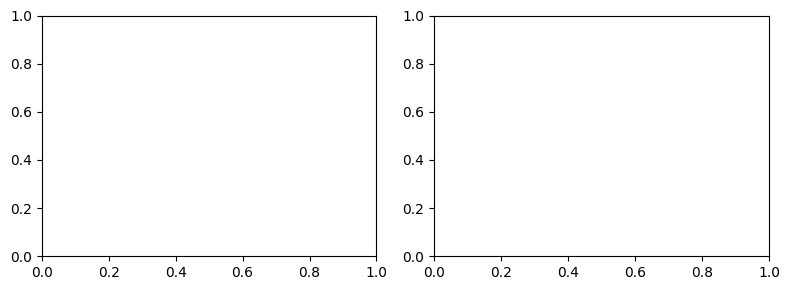

In [13]:
fig,axs = plt.subplots( 1, 2, figsize=(8,3), tight_layout=True )
for ax,i in zip(axs, [i_low, i_high]):
    ax.scatter( sugr[i], y[i], alpha=0.5, color='g' )
    plot_regression_line(ax, sugr[i], y[i], color='k', ls='-', lw=2)
[axs[0].plot(sugr[i_low].mean(), q, 'ro')  for q in [3,4,5]]
[axs[1].plot(sugr[i_high].mean(), q, 'ro')  for q in [6,7,8]]
[ax.set_xlabel('Sugar')  for ax in axs] 
axs[0].set_title('Low-quality wines')
axs[0].set_ylabel('Quality')
axs[1].set_title('High-quality wines')
plt.show()


These analyses show that the trends associated with just the means are unclear.

Let's now assemble all results into a single figure for reporting purposes:

In [ ]:
def plot_descriptive():
    
    fig,axs = plt.subplots( 2, 2, figsize=(8,6), tight_layout=True )
    ivs     = [acid, dens1, sugr]
    colors  = 'b', 'r', 'g'
    for ax,x,c in zip(axs.ravel(), ivs, colors):
        ax.scatter( x, y, alpha=0.5, color=c )
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
        r   = corrcoeff(x, y)
        ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    xlabels = 'Acidity', 'Density (10e3)', 'Sugar' 
    [ax.set_xlabel(s) for ax,s in zip(axs.ravel(),xlabels)]
    axs[0,1].set_xticks([990, 995, 1000, 1005])
    [ax.set_ylabel('Quality') for ax in axs[:,0]]
    [ax.set_yticklabels([])  for ax in axs[:,1]]


    ax       = axs[1,1]
    i_low    = y <= 5
    i_high   = y > 5
    fcolors  = 'm', 'c'
    labels   = 'Low-quality', 'High-quality'
    q_groups = [[3,4,5], [6,7,8]]
    ylocs    = 0.3, 0.7
    for i,c,s,qs,yloc in zip([i_low, i_high], fcolors, labels, q_groups, ylocs):
        ax.scatter( sugr[i], y[i], alpha=0.5, color=c, facecolor=c, label=s )
        plot_regression_line(ax, sugr[i], y[i], color=c, ls='-', lw=2)
        [ax.plot(sugr[i].mean(), q, 'o', color=c, mfc='w', ms=10)  for q in qs]
        r   = corrcoeff(sugr[i], y[i])
        ax.text(0.7, yloc, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

    ax.legend()
    ax.set_xlabel('Sugar')

    panel_labels = 'a', 'b', 'c', 'd'
    [ax.text(0.02, 0.92, f'({s})', size=12, transform=ax.transAxes)  for ax,s in zip(axs.ravel(), panel_labels)]
    plt.show()
    
    display_title('Correlations amongst main variables.', pref='Figure', num=1)

    
plot_descriptive()